In [1]:
import os
import pandas as pd
from typing import Optional, Sequence, Union

pd.set_option('display.max_columns', None)

from core import * 

In [2]:
df = load_data(r'D:\Documents\Python\CREATE_DATA\winemag-data_first150k.xlsx')   
v = 'price'
v2 ='variety'  

In [ ]:
profile(df)   

ROW TOTAL = 150,930 COLUMNS = 10


,Variable Name,Variable Type,Missing Count,% Blank,Unique Values,Most Frequent Value,Mean,Standard Deviation,Min,25%,Median,75%,Max
0,country,object,5,0,48,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,description,object,0,0,97821,"86-88 This could work as a rich wine, because ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,designation,object,45735,30,30620,Reserve,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,points,int64,0,0,21,87,87.89,3.22,80.0,86.0,88.0,90.0,100.0
4,price,float64,13695,9,357,20.0,33.13,36.32,4.0,16.0,24.0,40.0,2300.0
5,province,object,5,0,455,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,region_1,object,25060,17,1236,Napa Valley,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,region_2,object,89977,60,18,Central Coast,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,variety,object,0,0,632,Chardonnay,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,winery,object,0,0,14810,Williams Selyem,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
bar_chart_data(df,v2)  

,variety,count,Percentage,Cumulative %
0,Chardonnay,14482,9.60,9.60
1,Pinot Noir,14291,9.47,19.07
2,Cabernet Sauvignon,12800,8.48,27.55
3,Red Blend,10062,6.67,34.22
4,Bordeaux-style Red Blend,7347,4.87,39.09
5,Sauvignon Blanc,6320,4.19,43.28


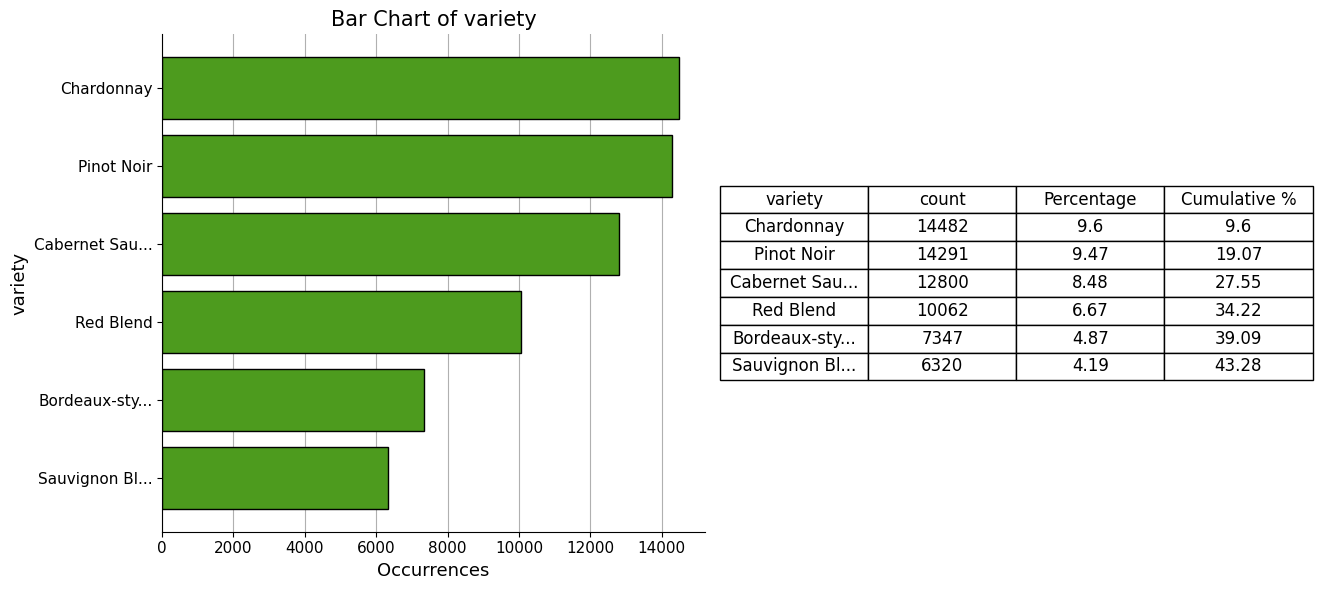

In [5]:
bar(df,v2)

In [6]:
hist_data(df, v)  

,Statistic,Value
0,Min,4.00
1,25% Quartile,16.00
2,Mean,33.13
3,Median,24.00
4,75% Quartile,40.00
5,Max,2300.00
6,Standard Deviation,36.32
7,Count of Rows,150930.00
8,Count of Rows Not Blank,137235.00
9,% Blank,9.07


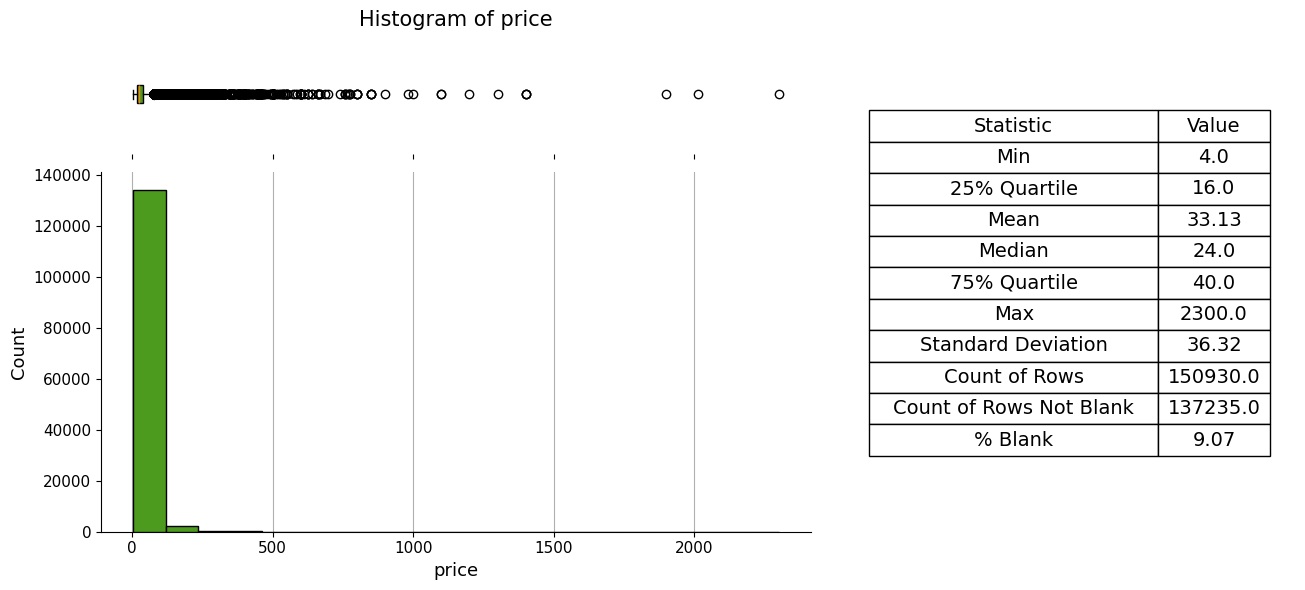

In [ ]:

hist(df, v)

# hist(df, v,  xlim=[0, 50], n_bins=20)


---

### EDA

IndentationError: expected an indented block after 'if' statement on line 4 (257789445.py, line 6)

---
Profile testing above. 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from typing import Optional

def linreg_plot(
    df, 
    xvar: str, 
    yvar: str,
    xtitle:  Optional[str]   = None, 
    ytitle:  Optional[str]   = None,
    alpha:   Optional[float] = 0.8 , 
    show_r2: Optional[bool]  = True ):
    """
    Quick linear regression plot for exploratory analysis.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe.
    xvar, yvar : str
        Column names for X and Y.
    xtitle, ytitle : str, optional
        Axis titles (defaults to column names).
    alpha : float, optional
        Scatter transparency (default = 0.8).
    show_r2 : bool, optional
        Whether to print R² score in console.

    Returns
    -------
    model : sklearn.linear_model.LinearRegression
        Fitted model (for further use if needed).
    """

    # Drop rows with missing data
    data = df[[xvar, yvar]].dropna()

    x = data[[xvar]].values
    y = data[yvar].values

    model = LinearRegression().fit(x, y)
    r2 = model.score(x, y)
    m, b = model.coef_[0], model.intercept_

    if show_r2:
        print(f"R² = {r2:.3f}")

    # Predicted values
    y_pred = model.predict(x)

    # Label for regression line
    label = f"Y = {m:.3f}·X + {b:.2f} (R²={r2:.2f})"

    # Plot
    with plt.style.context("seaborn-v0_8-whitegrid"):
        plt.figure(figsize=(5.2, 4.8))
        plt.scatter(x, y, alpha=alpha, label="Data")
        plt.plot(x, y_pred, color="red", linewidth=2, label=label)
        plt.xlabel(xtitle or xvar, fontsize=13)
        plt.ylabel(ytitle or yvar, fontsize=13)
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fontsize=11, frameon=True)
        plt.tight_layout()
        plt.show()

    return model


In [ ]:
m = linreg_plot( df3 , "A", "B")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

def lm_stats_plot(
    df: pd.DataFrame,
    xvar: str,
    yvar: str,
    xtitle: str = None,
    ytitle: str = None,
    alpha: float = 0.8,
    show_summary: bool = True
):
    """
    PURPOSE
    -------
    Fit a simple linear regression model using statsmodels and visualize the results.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe.
    xvar : str
        Independent variable (X).
    yvar : str
        Dependent variable (Y).
    xtitle, ytitle : str, optional
        Axis labels. Defaults to column names.
    alpha : float, optional
        Scatter transparency (default = 0.8).
    show_summary : bool, optional
        Whether to print the regression summary table (default = True).

    Returns
    -------
    model : statsmodels.regression.linear_model.RegressionResultsWrapper
        The fitted statsmodels OLS regression model.
    """

    # Drop missing values for the chosen variables
    data = df[[xvar, yvar]].dropna()

    # Independent variable (add constant for intercept)
    X = sm.add_constant(data[xvar])
    y = data[yvar]

    # Fit OLS model
    model = sm.OLS(y, X).fit()

    # Optionally print full regression summary
    if show_summary:
        print(model.summary())

    # Extract regression line
    x_vals = np.linspace(data[xvar].min(), data[xvar].max(), 100)
    X_pred = sm.add_constant(x_vals)
    y_pred = model.predict(X_pred)

    # Plot
    with plt.style.context("seaborn-v0_8-whitegrid"):
        plt.figure(figsize=(5.5, 4.8))
        plt.scatter(data[xvar], data[yvar], alpha=alpha, label="Observed")
        plt.plot(x_vals, y_pred, color="red", linewidth=2, label="Fitted line")

        # Labels
        plt.xlabel(xtitle or xvar, fontsize=13)
        plt.ylabel(ytitle or yvar, fontsize=13)

        # Equation annotation
        slope = model.params[xvar]
        intercept = model.params["const"]
        r2 = model.rsquared
        eqn = f"Y = {slope:.3f}·X + {intercept:.2f} (R²={r2:.2f})"
        plt.legend([eqn], loc="upper center", bbox_to_anchor=(0.5, 1.15), fontsize=11)

        plt.tight_layout()
        plt.show()

    return model


In [ ]:
model = lm_stats_plot(df3, "A", "B")  